In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
resist="Resistència "
import os

if not os.path.exists("images"):
    os.mkdir("images")
import matplotlib.pyplot as plt



In [10]:
p1=pd.read_csv("f1.csv",sep=",")
p2=pd.read_csv("f2.csv",sep=",",decimal=",")
p1.head()

,,Area,Mean,Min,Max,X,Y
0,1,0.0,209,209,209,0.479,0.116
1,2,0.0,210,210,210,0.405,0.126
2,3,0.0,209,209,209,0.358,0.126
3,4,0.0,214,214,214,0.282,0.125
4,5,0.0,212,212,212,0.205,0.139


In [13]:
#Dades:
I=0.1
uI=0.01
Va=3000
uVa=2000
Vp=850
uVp=100
Y2=2*p1["Y"]
X2Y2=p1["X"]**2+p1["Y"]**2

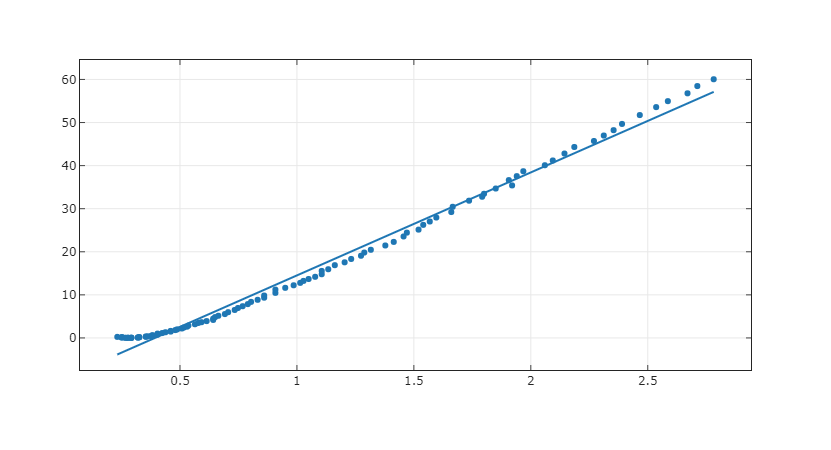

In [17]:
f=px.scatter(x=Y2,y=X2Y2,trendline="ols",template='simple_white')
f.update_xaxes(ticks="inside",
            mirror='ticks',showline=True,showgrid=True
            )
f.update_yaxes(ticks="inside",
            mirror='ticks',showline=True,showgrid=True

            )
f.update_layout(
    xaxis_title = r'$2y \textrm{ (m)}$',
    yaxis_title = r'$x^2+y^2 \textrm{ (m)}$',
)
#                     xaxis_title=r'$2y$',
#                     yaxis_title=r'$x^2+y^2$')
re= px.get_trendline_results(f)
re= re.iloc[0]["px_fit_results"].summary()
f.show()


In [18]:
fit_results = px.get_trendline_results(f).px_fit_results.iloc[0]

u=fit_results.bse
m=fit_results.params

In [20]:
u,m

(array([0.30900299, 0.24001471]), array([-9.39195114, 23.90450169]))

In [30]:
k=1.265569250534297
uk=0.0718532701389007
uI=0.01
K=0.0042314
d=54/1000
R=m[1]/100
uR=u[1]/100
qm=k*Vp/(d*K**2*I**2*R)
uqm=np.sqrt((uk*Vp/(d*K**2*I**2*R))**2+(uVp*k/(d*K**2*I**2*R))**2+(uR*k*Vp/(d*K**2*I**2*R**2))**2+(uI*2*k*Vp/(d*K**2*I**3*R))**2)

In [29]:
print(qm,uqm)

465439483255.48285 111282965199.09042
